In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
titanic = pd.read_csv("titanic.csv").rename(columns={'Survived':'S','Pclass':'C','Sex':'G','Age':'A'})
titanic.head()

,S,C,G,A
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


In [3]:
titanic.describe()

,S,C,G,A
count,887.000000,887.000000,887.000000,887.000000
mean,0.385569,2.305524,0.645998,29.471443
std,0.487004,0.836662,0.478480,14.121908
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,2.000000,0.000000,20.250000
50%,0.000000,3.000000,1.000000,28.000000
75%,1.000000,3.000000,1.000000,38.000000
max,1.000000,3.000000,1.000000,80.000000


In [4]:
titanic.isna().sum()

S    0
C    0
G    0
A    0
dtype: int64

C:\Users\lpott\anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
C:\Users\lpott\anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
C:\Users\lpott\anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly im

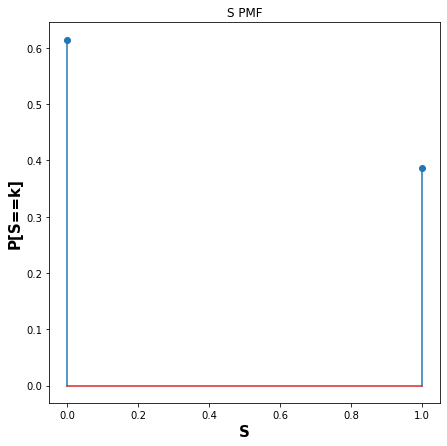

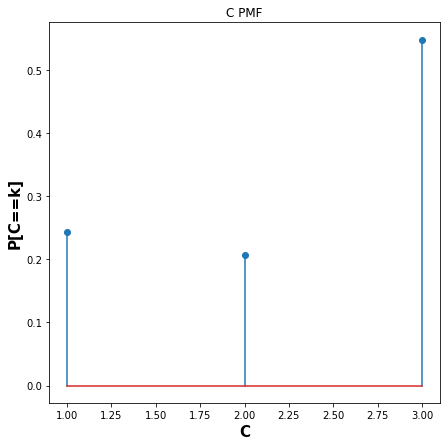

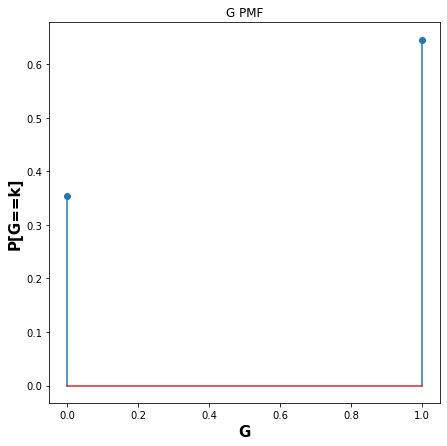

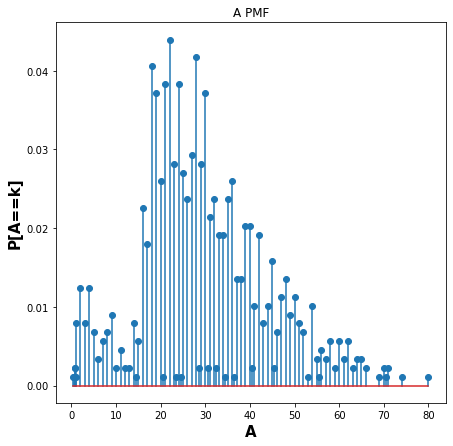

In [5]:
# a
N = titanic.shape[0]
PMF = {}
for col in titanic.columns:
    plt.figure(figsize=(7,7))
    ps = titanic[col].value_counts()/N
    plt.stem(ps.index,ps)
    plt.title("{} PMF".format(col))
    plt.xlabel(col,fontsize=15,weight='bold')
    plt.ylabel("P[{}==k]".format(col),fontsize=15,weight='bold')
    PMF[col] = ps

In [6]:
# b
survived = titanic.pop("S")

In [7]:
survived.unique()

array([0, 1], dtype=int64)

C:\Users\lpott\anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
C:\Users\lpott\anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
C:\Users\lpott\anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly im

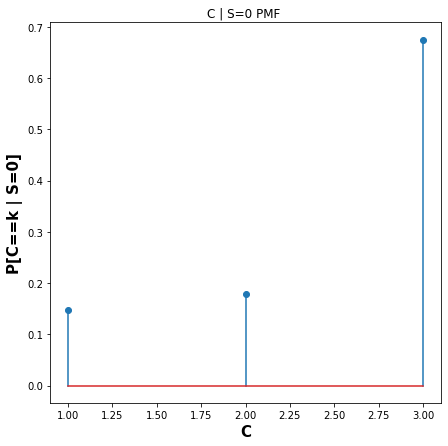

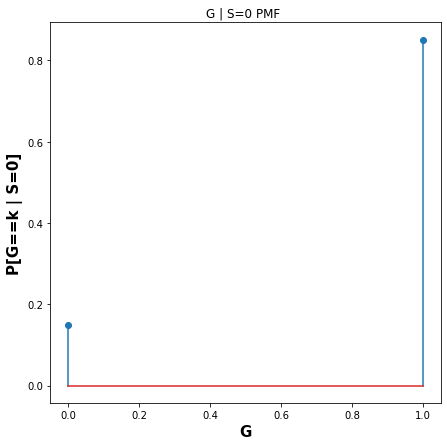

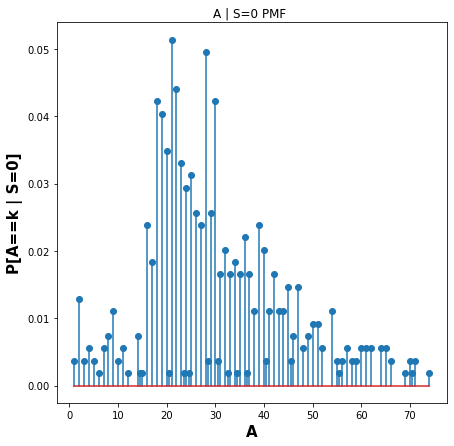

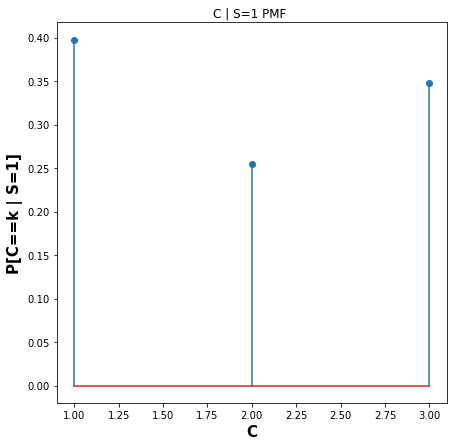

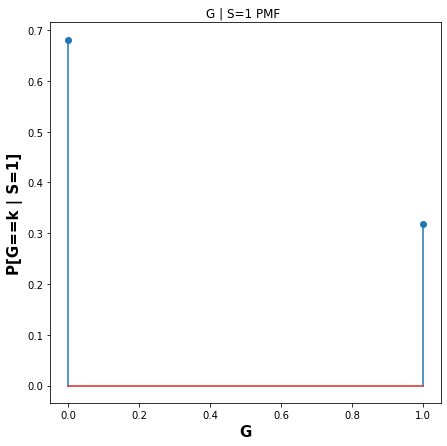

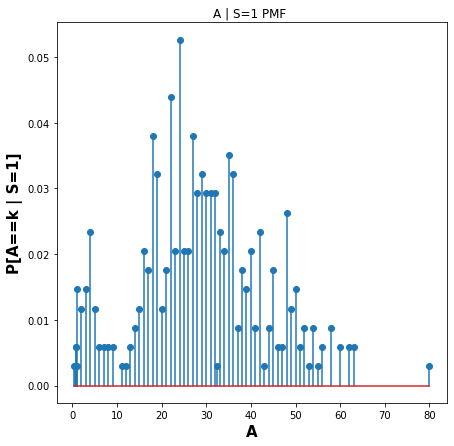

In [9]:
PMF_Conditioned = {}
for survival in survived.unique():
    for col in titanic.columns:
        plt.figure(figsize=(7,7))
        N = (survived==survival).sum()
        ps = (titanic[col][survived==survival]).value_counts()  / N
        plt.stem(ps.index,ps)
        plt.title("{} | S={} PMF ".format(col,survival))
        plt.xlabel(col,fontsize=15,weight='bold')
        plt.ylabel("P[{}==k | S={}]".format(col,survival),fontsize=15,weight='bold')
        PMF_Conditioned["{}|S={}".format(col,survival)] = ps

In [17]:
# c 
p0 = PMF['S'][0]*((PMF_Conditioned["A|S=0"][PMF_Conditioned["A|S=0"].index<=40]).sum())*(PMF_Conditioned["C|S=0"][1])*(PMF_Conditioned["G|S=0"][0])

In [18]:
p1 = PMF['S'][1]*((PMF_Conditioned["A|S=1"][PMF_Conditioned["A|S=1"].index<=40]).sum())*(PMF_Conditioned["C|S=1"][1])*(PMF_Conditioned["G|S=1"][0])

In [19]:
p0

0.010625322687488965

In [20]:
p1

0.08460553314142813

In [21]:
# d (she will survive)

In [22]:
p0 / (p0 + p1)

0.11157436941003064

In [23]:
p1 / (p0 + p1)

0.8884256305899694